In [20]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy as sp
from fractions import Fraction
from empiricaldist import Pmf
import matplotlib.pyplot as plt

In [2]:
coin = Pmf()
coin['heads'] = Fraction(1, 2)
coin['tails'] = Fraction(1, 2)
coin

,probs
heads,1/2
tails,1/2


In [3]:
dice = Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [6]:
letters = Pmf.from_seq(list('Mississippi'))
letters, letters['s']

(M    0.090909
 i    0.363636
 p    0.181818
 s    0.363636
 Name: , dtype: float64,
 0.36363636363636365)

In [7]:
dice([1, 4, 7])

array([0.16666667, 0.16666667, 0.        ])

In [8]:
prior = Pmf.from_seq(['B1', 'B2'])
prior

,probs
B1,0.5
B2,0.5


In [9]:
likelihood_van = [3/4, 1/2]
posterior = prior * likelihood_van
posterior

,probs
B1,0.375
B2,0.250


In [10]:
posterior.normalize()

0.625

In [11]:
posterior

,probs
B1,0.6
B2,0.4


In [12]:
posterior *= likelihood_van
posterior.normalize()
posterior

,probs
B1,0.692308
B2,0.307692


In [13]:
likelihood_cho = [1/4, 1/2]

In [14]:
posterior *= likelihood_cho
posterior.normalize()
posterior

,probs
B1,0.529412
B2,0.470588


In [15]:
hypos = np.arange(101)
hypos

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [17]:
prior = Pmf(1, hypos)
prior.normalize()
prior

,probs
0,0.009901
1,0.009901
2,0.009901
3,0.009901
4,0.009901
...,...
96,0.009901
97,0.009901
98,0.009901
99,0.009901


In [28]:
likelihood_van = hypos / 100
likelihood_cho = 1 - likelihood_van
likelihood_van

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [19]:
posterior1 = prior * likelihood_van
posterior1.normalize()
posterior1

,probs
0,0.000000
1,0.000198
2,0.000396
3,0.000594
4,0.000792
...,...
96,0.019010
97,0.019208
98,0.019406
99,0.019604


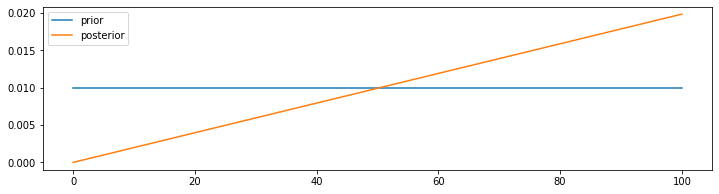

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(prior, label='prior')
ax.plot(posterior1, label='posterior')
plt.legend()
plt.show()

In [26]:
posterior2 = posterior1 * likelihood_van
posterior2.normalize()
posterior2

,probs
0,0.000000
1,0.000003
2,0.000012
3,0.000027
4,0.000047
...,...
96,0.027238
97,0.027808
98,0.028385
99,0.028967


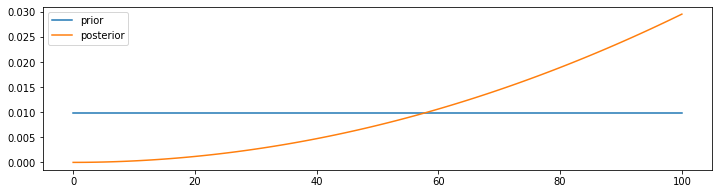

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(prior, label='prior')
ax.plot(posterior2, label='posterior')
plt.legend()
plt.show()

In [29]:
posterior3 = posterior2 * likelihood_cho
posterior3.normalize()
posterior3

,probs
0,0.000000
1,0.000012
2,0.000047
3,0.000105
4,0.000184
...,...
96,0.004424
97,0.003388
98,0.002305
99,0.001176


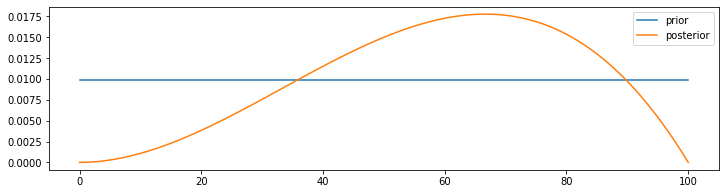

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(prior, label='prior')
ax.plot(posterior3, label='posterior')
plt.legend()
plt.show()

In [32]:
posterior3.idxmax(), posterior3.max_prob()

(67, 67)

In [33]:
hypos = [6, 8, 12]

In [34]:
prior = Pmf(1, hypos)
prior.normalize()
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [35]:
prior.qs, prior.ps

(array([ 6,  8, 12], dtype=int64), array([0.33333333, 0.33333333, 0.33333333]))

In [36]:
likelihood1 = 1/6, 1/8, 1/12
likelihood2 = 0, 1/8, 1/12

In [37]:
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


In [38]:
posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


In [39]:
def update_dice(pmf, data):
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [40]:
pmf = prior.copy()

In [42]:
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692
